EDA Siniestros viales

In [92]:
#Importamos las librerias a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Importamos la Dataframe que vamos a trabajar

In [93]:
#importamos las hojas del Dataset que se usaran 
df_hechos = pd.read_csv('../Datasets/homicidios_proc.csv')
df_victimas = pd.read_csv('../Datasets/homicidios_victimas_proc.csv')

Revisamos la consistenvia del df_hechos

In [94]:
df_hechos#obtenemos una descripción concisa y resumida del DataFrame. 

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,8,-58.465039,-34.680930,MOTO-AUTO,MOTO,AUTO
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AVENIDA,7,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
691,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AUTOPISTA,9,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
692,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AVENIDA,11,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
693,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AVENIDA,9,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS


In [95]:
#Se genera un resumen estadístico para todas las columnas, tanto numéricas como categóricas.
df_hechos.describe(include='all')

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
count,695,695.000000,695,695.000000,695.000000,695.000000,695,695.000000,695,695.000000,695.000000,695.000000,695,695,695
unique,695,NaN,598,NaN,NaN,NaN,322,NaN,4,NaN,NaN,NaN,36,9,9
top,2016-0001,NaN,2018-12-18,NaN,NaN,NaN,14:00:00,NaN,AVENIDA,NaN,NaN,NaN,PEATON-PASAJEROS,MOTO,AUTO
freq,1,NaN,3,NaN,NaN,NaN,11,NaN,429,NaN,NaN,NaN,109,302,220
mean,NaN,1.030216,NaN,2018.191367,6.684892,15.920863,NaN,11.677698,NaN,7.437410,-58.441369,-34.619551,NaN,NaN,NaN
std,NaN,0.179519,NaN,1.682915,3.568189,8.635648,NaN,6.686022,NaN,4.378857,0.046215,0.035408,NaN,NaN,NaN
min,NaN,1.000000,NaN,2016.000000,1.000000,1.000000,NaN,0.000000,NaN,1.000000,-58.529942,-34.705250,NaN,NaN,NaN
25%,NaN,1.000000,NaN,2017.000000,4.000000,9.000000,NaN,6.000000,NaN,4.000000,-58.476178,-34.643608,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2018.000000,7.000000,16.000000,NaN,11.000000,NaN,8.000000,-58.444513,-34.622973,NaN,NaN,NaN
75%,NaN,1.000000,NaN,2020.000000,10.000000,23.000000,NaN,17.500000,NaN,11.000000,-58.401412,-34.596003,NaN,NaN,NaN


Se evidencia que no hay datos nulos, en el top se puede ver que la mayoria de las victimas son motos y la moyoria de acusados son autos y los participantes mas repetido son peaton-pasajeros

In [96]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             695 non-null    object 
 1   N_VICTIMAS     695 non-null    int64  
 2   FECHA          695 non-null    object 
 3   AAAA           695 non-null    int64  
 4   MM             695 non-null    int64  
 5   DD             695 non-null    int64  
 6   HORA           695 non-null    object 
 7   HH             695 non-null    int64  
 8   TIPO_DE_CALLE  695 non-null    object 
 9   COMUNA         695 non-null    int64  
 10  LONGITUD       695 non-null    float64
 11  LATITUD        695 non-null    float64
 12  PARTICIPANTES  695 non-null    object 
 13  VICTIMA        695 non-null    object 
 14  ACUSADO        695 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 81.6+ KB


el Dtype de las columnas es el adecuado

En el ETL se identifico que los valores faltantes estavan como 'SD', verificamos si hay mas valores faltantes

In [97]:
df_hechos.replace('SD', np.nan, inplace=True)

In [98]:
df_hechos.isnull().sum()

ID               0
N_VICTIMAS       0
FECHA            0
AAAA             0
MM               0
DD               0
HORA             0
HH               0
TIPO_DE_CALLE    0
COMUNA           0
LONGITUD         0
LATITUD          0
PARTICIPANTES    0
VICTIMA          0
ACUSADO          0
dtype: int64

Se verifica que los valores faltantes ya fueron tratados

Verificamos outliers 

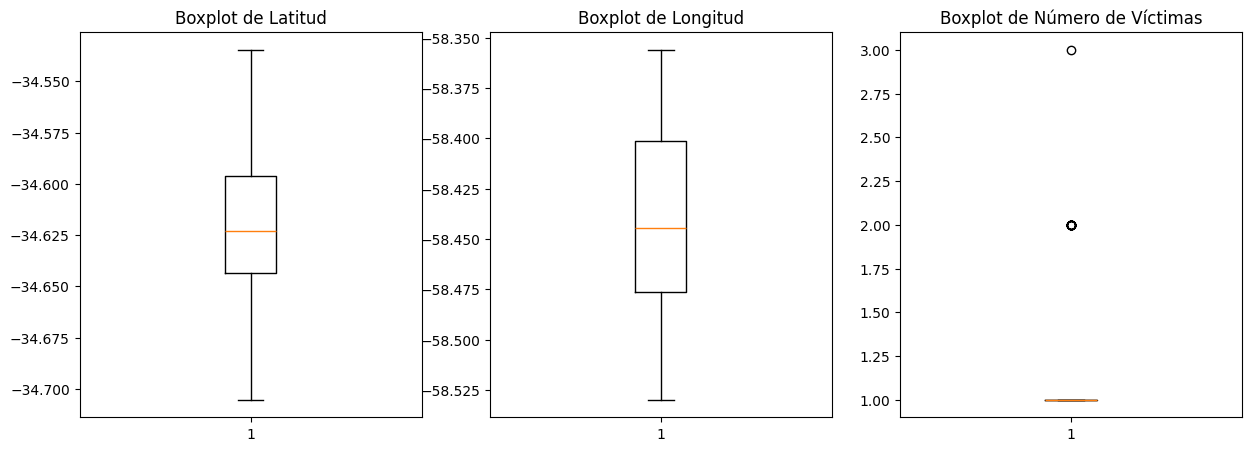

In [99]:
# Graficar boxplots 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Crear una figura con 3 subgráficos en una fila

# Boxplot para la columna de latitud
axs[0].boxplot(df_hechos['LATITUD'])
axs[0].set_title('Boxplot de Latitud')

# Boxplot para la columna de longitud
axs[1].boxplot(df_hechos['LONGITUD'])
axs[1].set_title('Boxplot de Longitud')

# Boxplot para la columna de número de víctimas
axs[2].boxplot(df_hechos['N_VICTIMAS'])
axs[2].set_title('Boxplot de Número de Víctimas')

plt.show()

Al observar los boxplots de las columnas de latitud y longitud, no se identifican valores atípicos (outliers). Esto sugiere que los datos de ubicación (latitud y longitud) no contienen valores inusuales o extremos que podrían indicar ubicaciones erróneas o fuera de la ciudad.

En cuanto a la columna de número de víctimas, se observan algunos valores atípicos, lo cual indica que en algunos casos hay un número inusualmente alto de víctimas en un accidente. Es importante investigar estos casos para comprender las circunstancias que llevaron a un mayor número de víctimas en esos incidentes particulares.

Este análisis nos proporciona una visión inicial de la distribución de los datos y nos ayuda a identificar áreas de interés para un análisis más detallado.

In [100]:
df_hechos[df_hechos['N_VICTIMAS']==3]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
169,2017-0035,3,2017-03-23,2017,3,23,05:00:00,5,AVENIDA,1,-58.358815,-34.611136,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO


Verificamos el outlier de la columna N_VICTIMAS corresponde a un acciden que ocurrio a las 5 am 

Varifiquemos si hay yna correlacion entres el dia de la semana, la hora y el numero de victimas

In [101]:
# Convierte la columna 'FECHA' a tipo datetime si no lo está
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'])

In [102]:
# Crea una nueva columna 'DIA_SEMANA' que contenga el día de la semana
df_hechos['N_DIA_SEMANA'] = df_hechos['FECHA'].dt.dayofweek

In [103]:
dias_semana = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}


In [104]:
# Crear una nueva columna con los nombres de los días 
df_hechos['DIA_SEMANA'] = df_hechos['FECHA'].dt.dayofweek.map(dias_semana)

In [105]:
victimas_por_dia = df_hechos.groupby('DIA_SEMANA')['N_VICTIMAS'].mean().reset_index()

In [ ]:
# Ordenar los días de la semana en función de su número (0 para lunes, 1 para martes, etc.)
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

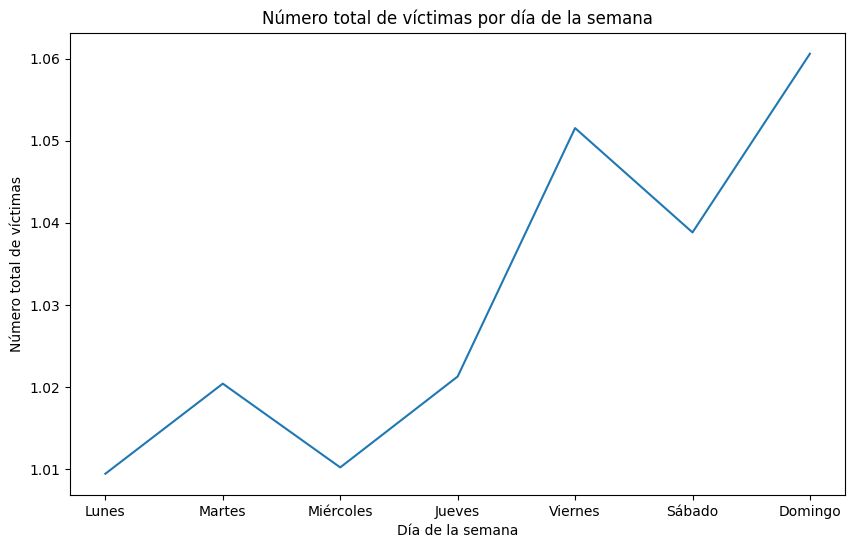

In [108]:
# Crear un gráfico de líneas del número de víctimas por día de la semana
plt.figure(figsize=(10, 6))
sns.lineplot(data=victimas_por_dia.sort_values(by='DIA_SEMANA', key=lambda x: x.map({v: i for i, v in enumerate(orden_dias)})), 
             x='DIA_SEMANA', y='N_VICTIMAS') 
plt.title('Número total de víctimas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número total de víctimas')
plt.xticks(ticks=np.arange(7), labels=orden_dias)  # Establecer las etiquetas de los ejes x como los días de la semana en orden
plt.show()

Este gráfico muestra una leve tendencia creciente hacia el fin de semana, con un ligero aumento en el número de víctimas a medida que nos acercamos al sábado y al domingo. Esto sugiere que los días de fin de semana pueden tener un mayor riesgo de accidentes con víctimas en comparación con los días laborables.

verifiquemos si hay una tendencia con respecto a las horas para los ultimos tres dias de la semana

In [112]:
# Filtrar los datos para los viernes, sábados y domingos
df_weekend = df_hechos[df_hechos['DIA_SEMANA'].isin(['Viernes', 'Sábado', 'Domingo'])]  

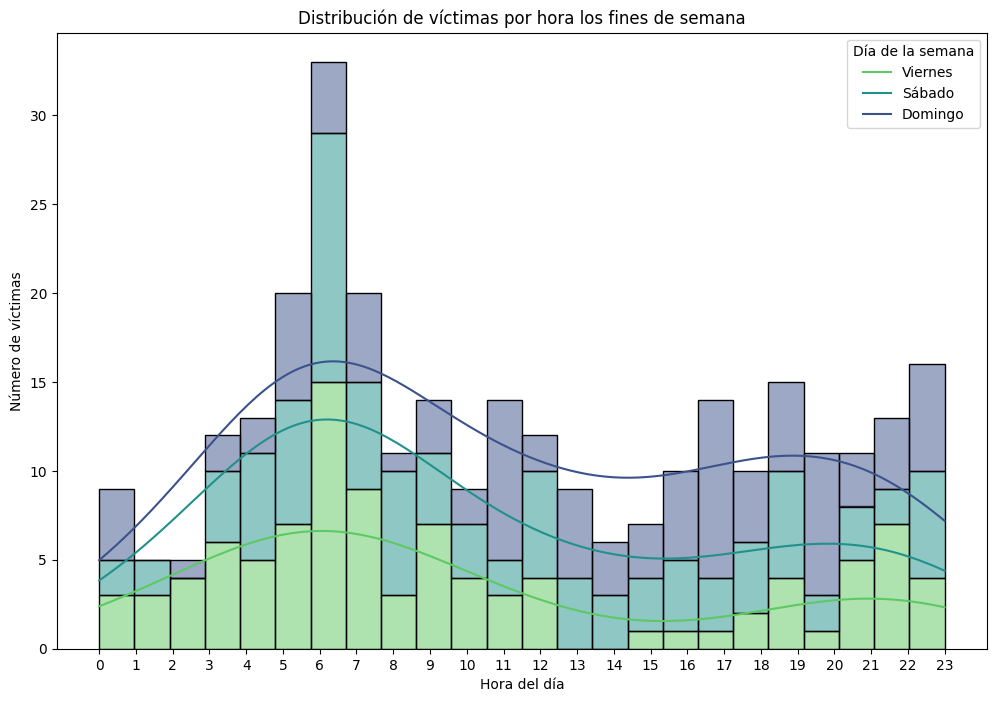

In [114]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.histplot(data=df_weekend, x='HH', bins=24, kde=True, hue='DIA_SEMANA', multiple='stack', palette='viridis')
plt.title('Distribución de víctimas por hora los fines de semana')
plt.xlabel('Hora del día')
plt.ylabel('Número de víctimas')
plt.xticks(range(0, 24))  # Mostrar todas las horas en el eje x
plt.legend(title='Día de la semana', labels=['Viernes', 'Sábado', 'Domingo'])
plt.show()

Se evidencia que los sábados y domingos, entre las 5 y las 7 de la mañana, se registra el mayor número de homicidios viales. Esto sugiere que durante esas horas tempranas del fin de semana, puede haber una mayor incidencia de incidentes viales fatales.

Verificamos las victimas en general

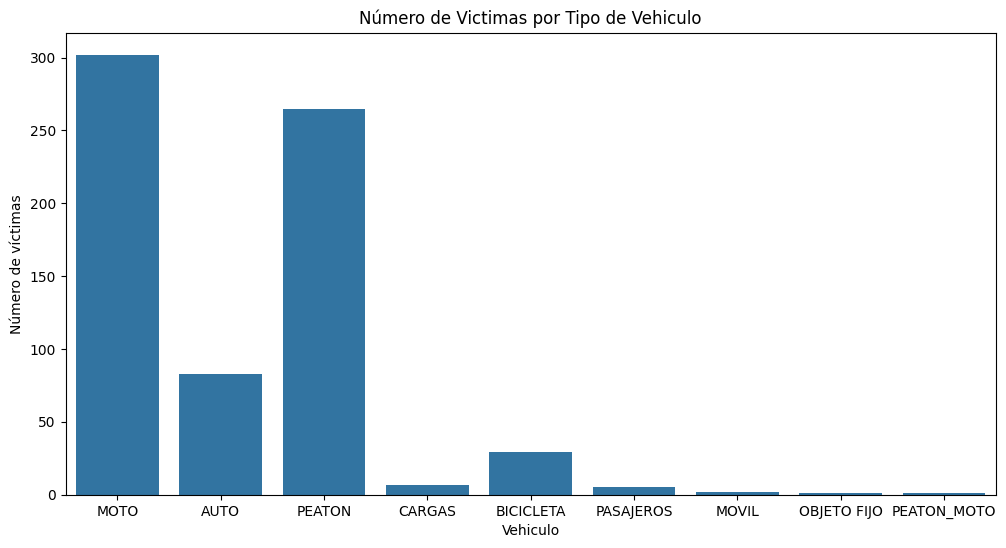

In [120]:
# Crear un gráfico de barras para el número de víctimas por hora del día
plt.figure(figsize=(12, 6))
sns.countplot(x='VICTIMA', data=df_hechos, )
plt.title('Número de Victimas por Tipo de Vehiculo')
plt.xlabel('Vehiculo')
plt.ylabel('Número de víctimas')
plt.show()

Se evidencia que la mayoria de las victimas son 'MOTO' y 'PEATON'

In [118]:
# Filtrar los datos para los sábados y domingos
df_weekend = df_hechos[(df_hechos['DIA_SEMANA'] == 'Sábado') | (df_hechos['DIA_SEMANA'] == 'Domingo')]

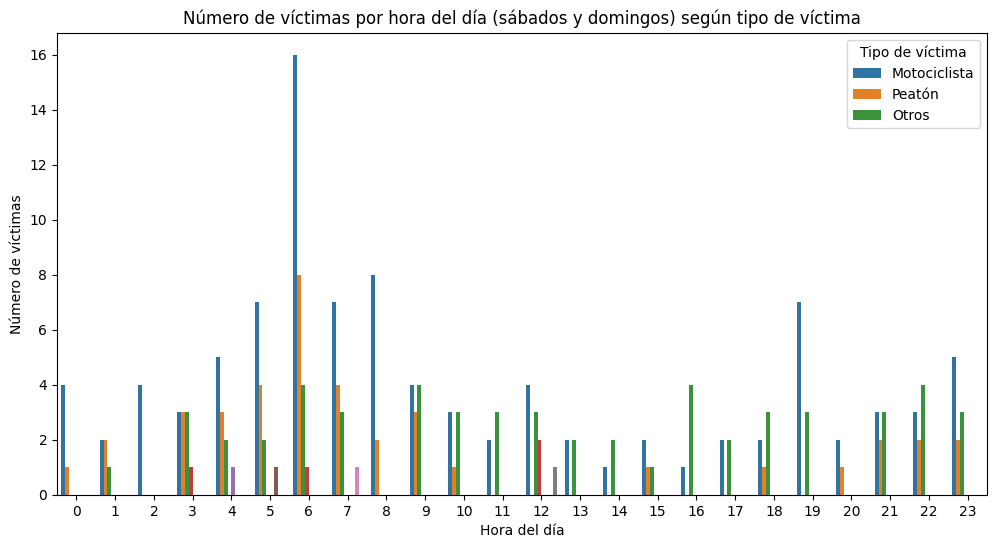

In [117]:
# Crear un gráfico de barras para el número de víctimas por hora del día
plt.figure(figsize=(12, 6))
sns.countplot(x='HH', data=df_weekend, hue='VICTIMA')
plt.title('Número de víctimas por hora del día (sábados y domingos) según tipo de víctima')
plt.xlabel('Hora del día')
plt.ylabel('Número de víctimas')
plt.legend(title='Tipo de víctima', labels=['Motociclista', 'Peatón', 'Otros'])
plt.show()

Aquí se evidencia que la mayoría de las víctimas son motociclistas y peatones, especialmente durante los sábados y domingos, en las horas entre las 5 y 7 de la mañana. Esto sugiere la importancia de tomar medidas específicas para mejorar la seguridad vial para estos grupos durante esos períodos.

Verificamos los acusados en general

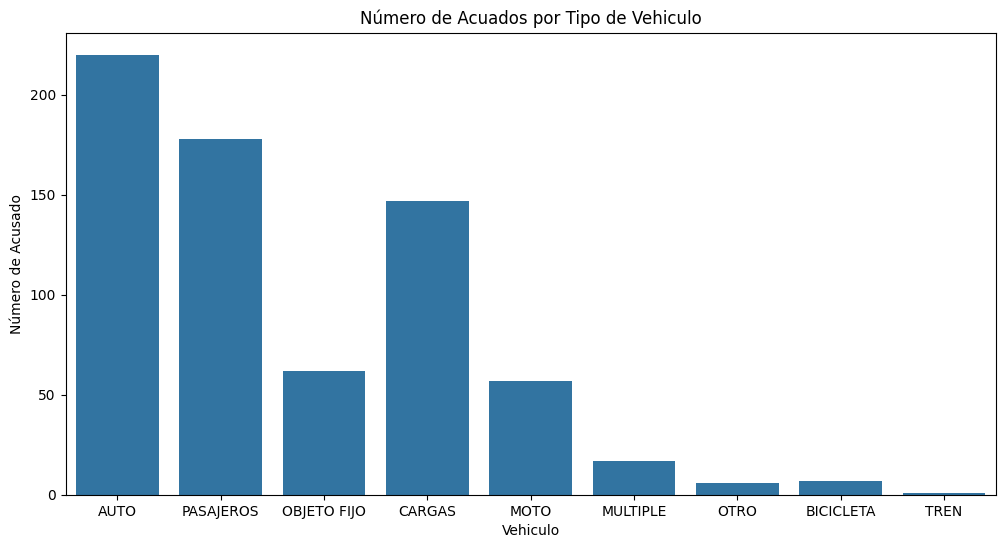

In [122]:
# Crear un gráfico de barras para el número de víctimas por hora del día
plt.figure(figsize=(12, 6))
sns.countplot(x='ACUSADO', data=df_hechos, )
plt.title('Número de Acuados por Tipo de Vehiculo')
plt.xlabel('Vehiculo')
plt.ylabel('Número de Acusado')
plt.show()

Se evidencia que la mayoria de acusados son autos, pasajeros y cargas

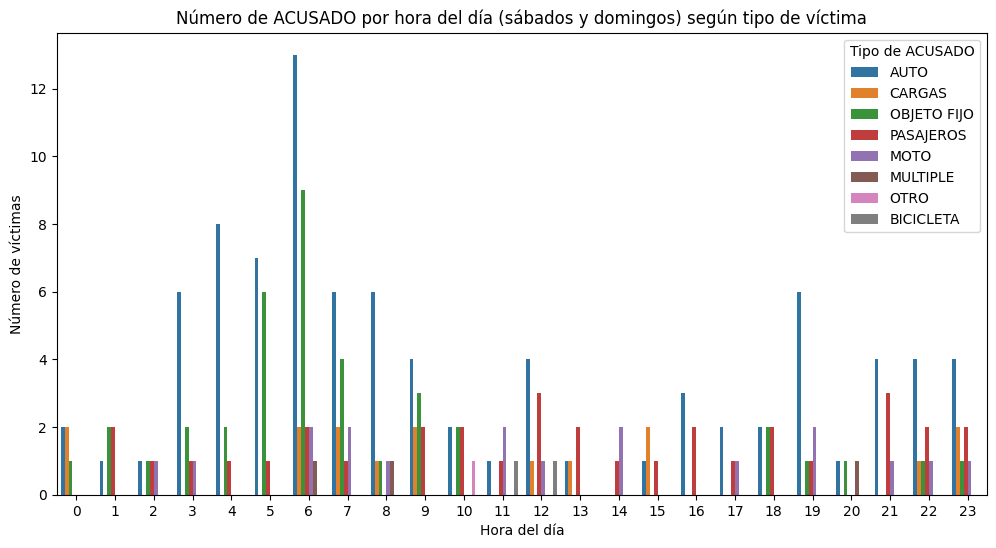

In [124]:
# Crear un gráfico de barras para el número de víctimas por hora del día
plt.figure(figsize=(12, 6))
sns.countplot(x='HH', data=df_weekend, hue='ACUSADO')
plt.title('Número de ACUSADO por hora del día (sábados y domingos) según tipo de víctima')
plt.xlabel('Hora del día')
plt.ylabel('Número de víctimas')
plt.legend(title='Tipo de ACUSADO') 
plt.show()

Aquí se evidencia que la mayoría de los acusados los días sábados y domingos, entre las 3 y las 9 de la mañana, son autos y objetos fijos.


Considerando que la mayoría de las víctimas son motociclistas y peatones, y que los principales acusados son autos y objetos fijos, se podría recomendar enfocar las campañas de seguridad vial en la protección y concientización de estos grupos vulnerables. Además, se debería prestar especial atención a las horas tempranas de la mañana, especialmente los fines de semana, para implementar medidas preventivas y reducir los accidentes en ese período.